In [124]:
import pandas as pd
import numpy as np
from astropy.io import ascii
import HTfunctions as ht
import matplotlib.pyplot as plt
from scipy import stats

In [125]:
ts = ascii.read("Data/nao_station_djfm.ascii").to_pandas()
ts.set_index(ts.year,inplace=True)
ts = ts.drop("year",axis=1)

In [126]:
final = ht.openDict("Data/finalSelectionList")
sel = final["ost"]["1983-2012"]
start = 1960
end = 2013

In [127]:
c = sel[25]
file = ht.findFiles(f"*{c}*","Data/annualSnowmelt")[0]
sm = pd.read_csv(file,index_col=1)

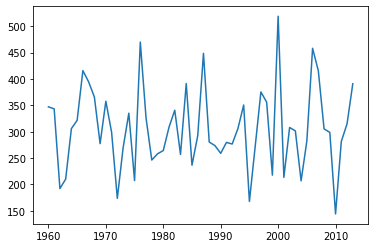

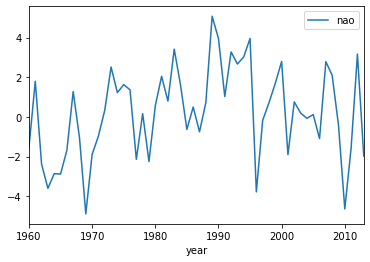

In [128]:
plt.plot(sm.loc[start:end].annual_sum)
ts.loc[start:end].plot()

Text(0, 0.5, 'Annual snowmelt')

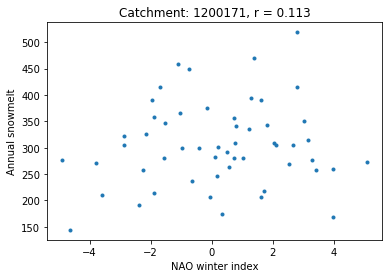

In [129]:
nao = np.array(ts.loc[start:end].nao)
snowmelt = np.array(sm.loc[start:end].annual_sum)
plt.plot(nao,snowmelt,".")
r = stats.pearsonr(nao,snowmelt)[0]
plt.title(f"Catchment: {c}, r = {r:.3}")
plt.xlabel("NAO winter index")
plt.ylabel("Annual snowmelt")

In [130]:
nao = np.array(ts.loc[start:end].nao)
corr = []
for c in sel:
    file = ht.findFiles(f"*{c}*.csv","Data/annualSnowmelt")[0]
    sm = pd.read_csv(file,index_col=1)
    snowmelt = np.array(sm.loc[start:end].annual_sum)
    r = stats.pearsonr(nao,snowmelt)[0]
    corr.append(r)
res = pd.DataFrame(list(zip(sel,corr)),columns=["snumber","nao_snowmelt_corr"])

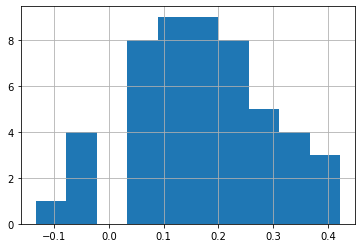

In [131]:
res.nao_snowmelt_corr.hist()